C:\Users\mouni\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.7802 - loss: 0.6170 - val_accuracy: 0.8326 - val_loss: 0.4490 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8173 - loss: 0.5100 - val_accuracy: 0.8433 - val_loss: 0.4319 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8281 - loss: 0.4789 - val_accuracy: 0.8427 - val_loss: 0.4285 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.8298 - loss: 0.4747 - val_accuracy: 0.8460 - val_loss: 0.4221 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.8302 - loss: 0.4721 - val_accuracy: 0.8394 - val_loss: 0.4446 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.8322 - loss: 0.4652 - val_accuracy: 0.8478 - val_loss: 0.4159 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accura

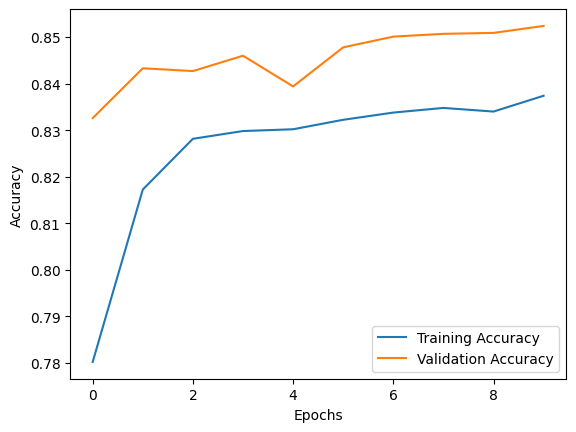

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
import tensorflow as tf 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
 ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 
* 10 ** (epoch / 20))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, 
y_test), callbacks=[lr_schedule])
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
